<a href="https://colab.research.google.com/github/sniiitik/WASSA-2017-EmoInt/blob/main/ML_Task_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# I have used Google Drive to store the DataSet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#The contents of the directory "/content/drive/MyDrive/ML Task" are listed when the Python code modifies the current working directory to that location. One by one, the directory's files and subdirectories' names are printed out.
import os
path='/content/drive/MyDrive/Data'
os.chdir("/content/drive/MyDrive/ML Task")
FolderContents=os.listdir()

for i in FolderContents:
    print(i)

joy_train.txt
sadness_train.txt
anger_train.txt
fear_train.txt
anger_development.txt
fear_development.txt
joy_development.txt
sadness_development.txt
fear_test.txt
joy_test.txt
sadness_test.txt
anger_test.txt


In [ ]:
#importing necessories libraries
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#nlp
from collections import Counter
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import metrics


import scipy

The Phases are:
EDA, Training, Testing, Evaluation, Analysis


1-EDA

In [ ]:
#Here we load the train data
cols = ['id', 'text', 'label', 'intensity']
path = "/content/drive/MyDrive/ML Task/"
anger_train = pd.read_csv(path + 'anger_train.txt', header=None, sep='\t', names=cols, index_col=0)
fear_train = pd.read_csv(path + 'fear_train.txt', header=None, sep='\t', names=cols, index_col=0)
sad_train = pd.read_csv(path + 'sadness_train.txt', header=None, sep='\t', names=cols, index_col=0)
joy_train = pd.read_csv(path + 'joy_train.txt', header=None, sep='\t', names=cols, index_col=0)

joy_train.head()

,text,label,intensity
id,,,
30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
30002,Been waiting all week for this game â¤ï¸â¤ï...,joy,0.940
30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
30004,I feel so blessed to work with the family that...,joy,0.938


In [ ]:
#check the ratio of total instance of each emotion
frames = [anger_train, fear_train, sad_train, joy_train]
data_training = pd.concat(frames)
data_training.reset_index(inplace=True)
data_training.label.value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [ ]:
data_training.head()

,id,text,label,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
#adding word_count, char_count, and punc_count feature
punc = string.punctuation
data_training['word_count'] = data_training['text'].apply(lambda x:len(x.split()))
data_training['char_count'] = data_training['text'].apply(lambda x:len(x.replace(' ','')))
data_training['punc_count'] = data_training['text'].apply(lambda x:len([a for a in x if a in punc]))
data_training.head()

,id,text,label,intensity,word_count,char_count,punc_count
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,18,79,12
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,23,97,4
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,19,90,4
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,24,111,13
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,24,102,6


Length of artists: 0


IndexError: list index out of range

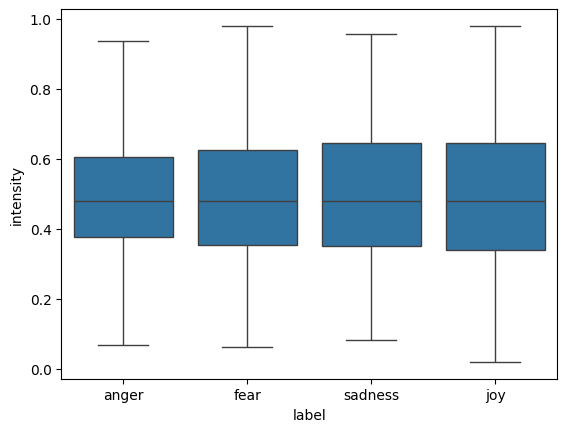

In [ ]:
#length of artist
print("Length of artists:", len(bplot.artists))
#see average intensity of each emotion
colors = ['red', 'black', 'lightblue', 'yellow']
bplot = sns.boxplot(data=data_training, x='label', y='intensity')
for i in range(4):
    bplot.artists[i].set_facecolor(colors[i])
plt.title('Average Intensity for Each Label')



Text(0.5, 1.08, 'Relationship between char_count and intensity')

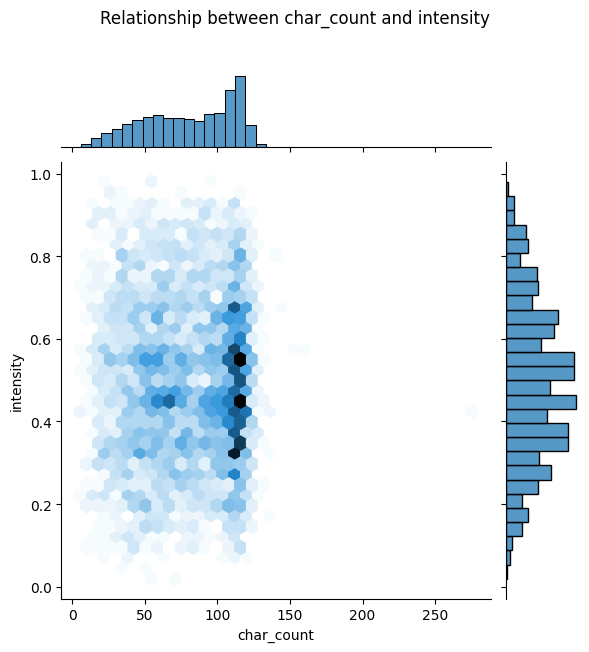

In [ ]:
#the relationship between intensity and character, word, and, punctuation counts
sns.jointplot(data=data_training, x='char_count', y='intensity', kind='hex')
plt.suptitle('Relationship between char_count and intensity', y=1.08)

Text(0.5, 1.08, 'Relationship between word_count and intensity')

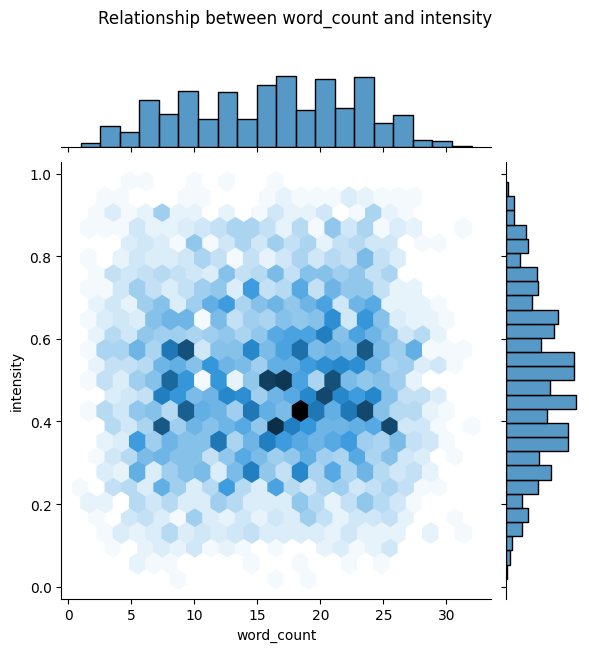

In [ ]:
sns.jointplot(data=data_training, x='word_count', y='intensity', kind='hex')
plt.suptitle('Relationship between word_count and intensity', y=1.08)

Text(0.5, 1.08, 'Relationship between punct_count and intensity')

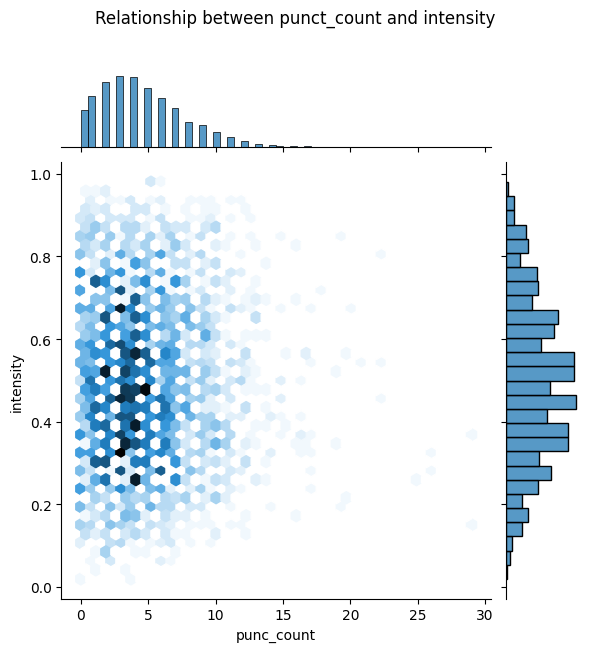

In [ ]:
sns.jointplot(data=data_training, x='punc_count', y='intensity', kind='hex')
plt.suptitle('Relationship between punct_count and intensity', y=1.08)

In [ ]:
#Join text in each emotion
join_text_fear = ' '.join(data_training[data_training['label']=='fear']['text'].values)
join_text_anger = ' '.join(data_training[data_training['label']=='anger']['text'].values)
join_text_joy = ' '.join(data_training[data_training['label']=='joy']['text'].values)
join_text_sadness = ' '.join(data_training[data_training['label']=='sadness']['text'].values)

<Axes: title={'center': '10 Most Used Hashtag for Sadness'}, ylabel='Hashtag'>

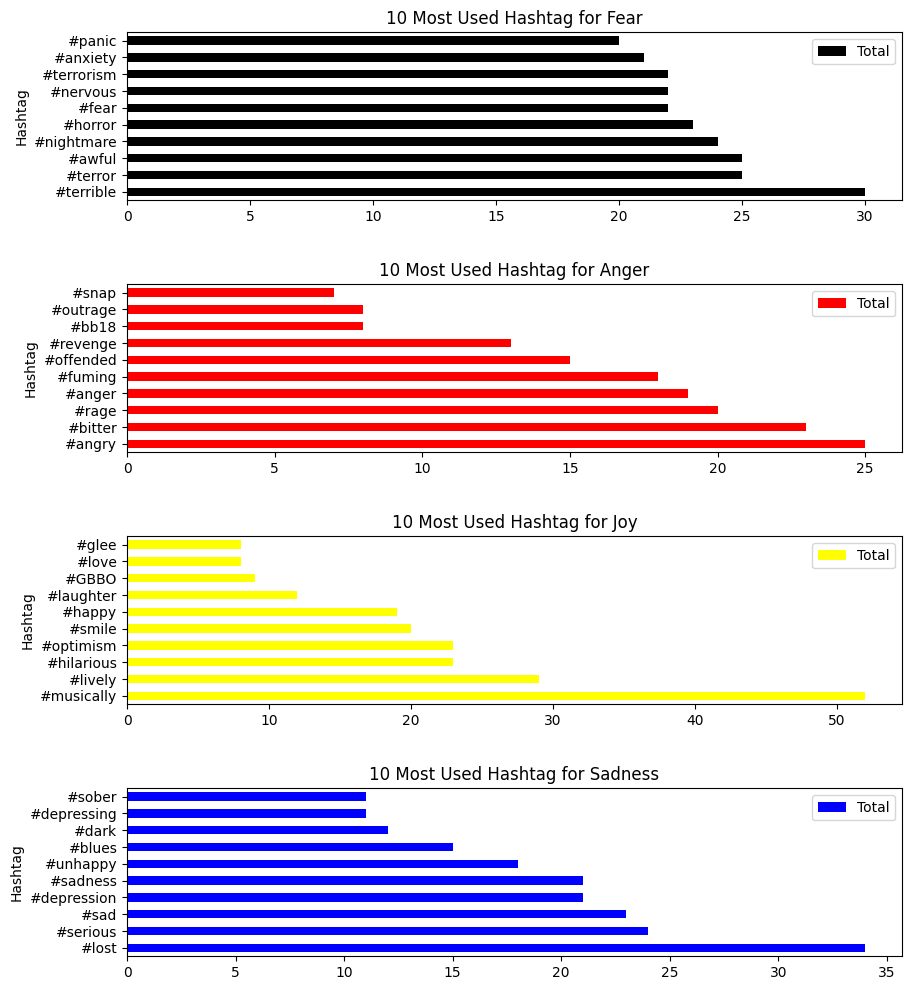

In [ ]:
#Show 10 most used hashtag for each emotion
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=.5)

fear_counter = Counter(word for word in join_text_fear.split(' ') if word != '' and word[0]=='#')
most_common = fear_counter.most_common(10)
df = pd.DataFrame(most_common, columns=["Hashtag", "Total"])
df.plot.barh(y="Total", x="Hashtag", ax=ax1, color="black",title="10 Most Used Hashtag for Fear")

anger_counter = Counter(word for word in join_text_anger.split(' ') if word != '' and word[0]=='#')
most_common = anger_counter.most_common(10)
df = pd.DataFrame(most_common, columns=["Hashtag", "Total"])
df.plot.barh(y="Total", x="Hashtag", ax=ax2, color="red",title="10 Most Used Hashtag for Anger")

joy_counter = Counter(word for word in join_text_joy.split(' ') if word != '' and word[0]=='#')
most_common = joy_counter.most_common(10)
df = pd.DataFrame(most_common, columns=["Hashtag", "Total"])
df.plot.barh(y="Total", x="Hashtag", ax=ax3, color="yellow",title="10 Most Used Hashtag for Joy")

sadness_counter = Counter(word for word in join_text_sadness.split(' ') if word != '' and word[0]=='#')
most_common = sadness_counter.most_common(10)
df = pd.DataFrame(most_common, columns=["Hashtag", "Total"])
df.plot.barh(y="Total", x="Hashtag", ax=ax4, color="blue",title="10 Most Used Hashtag for Sadness")

In [ ]:
#Word Cloud for each emotion
stopwords = set(STOPWORDS)

fear_wordcloud = WordCloud(max_font_size=50, background_color='black', stopwords=stopwords, width=900, height=400).generate(join_text_fear)
anger_wordcloud = WordCloud(max_font_size=50, background_color='darkred', stopwords=stopwords, width=900, height=400).generate(join_text_anger)
joy_wordcloud = WordCloud(max_font_size=50, background_color='lightyellow', stopwords=stopwords, width=900, height=400).generate(join_text_joy)
sadness_wordcloud = WordCloud(max_font_size=50, background_color='lightblue', stopwords=stopwords, width=900, height=400).generate(join_text_sadness)

(-0.5, 899.5, 399.5, -0.5)

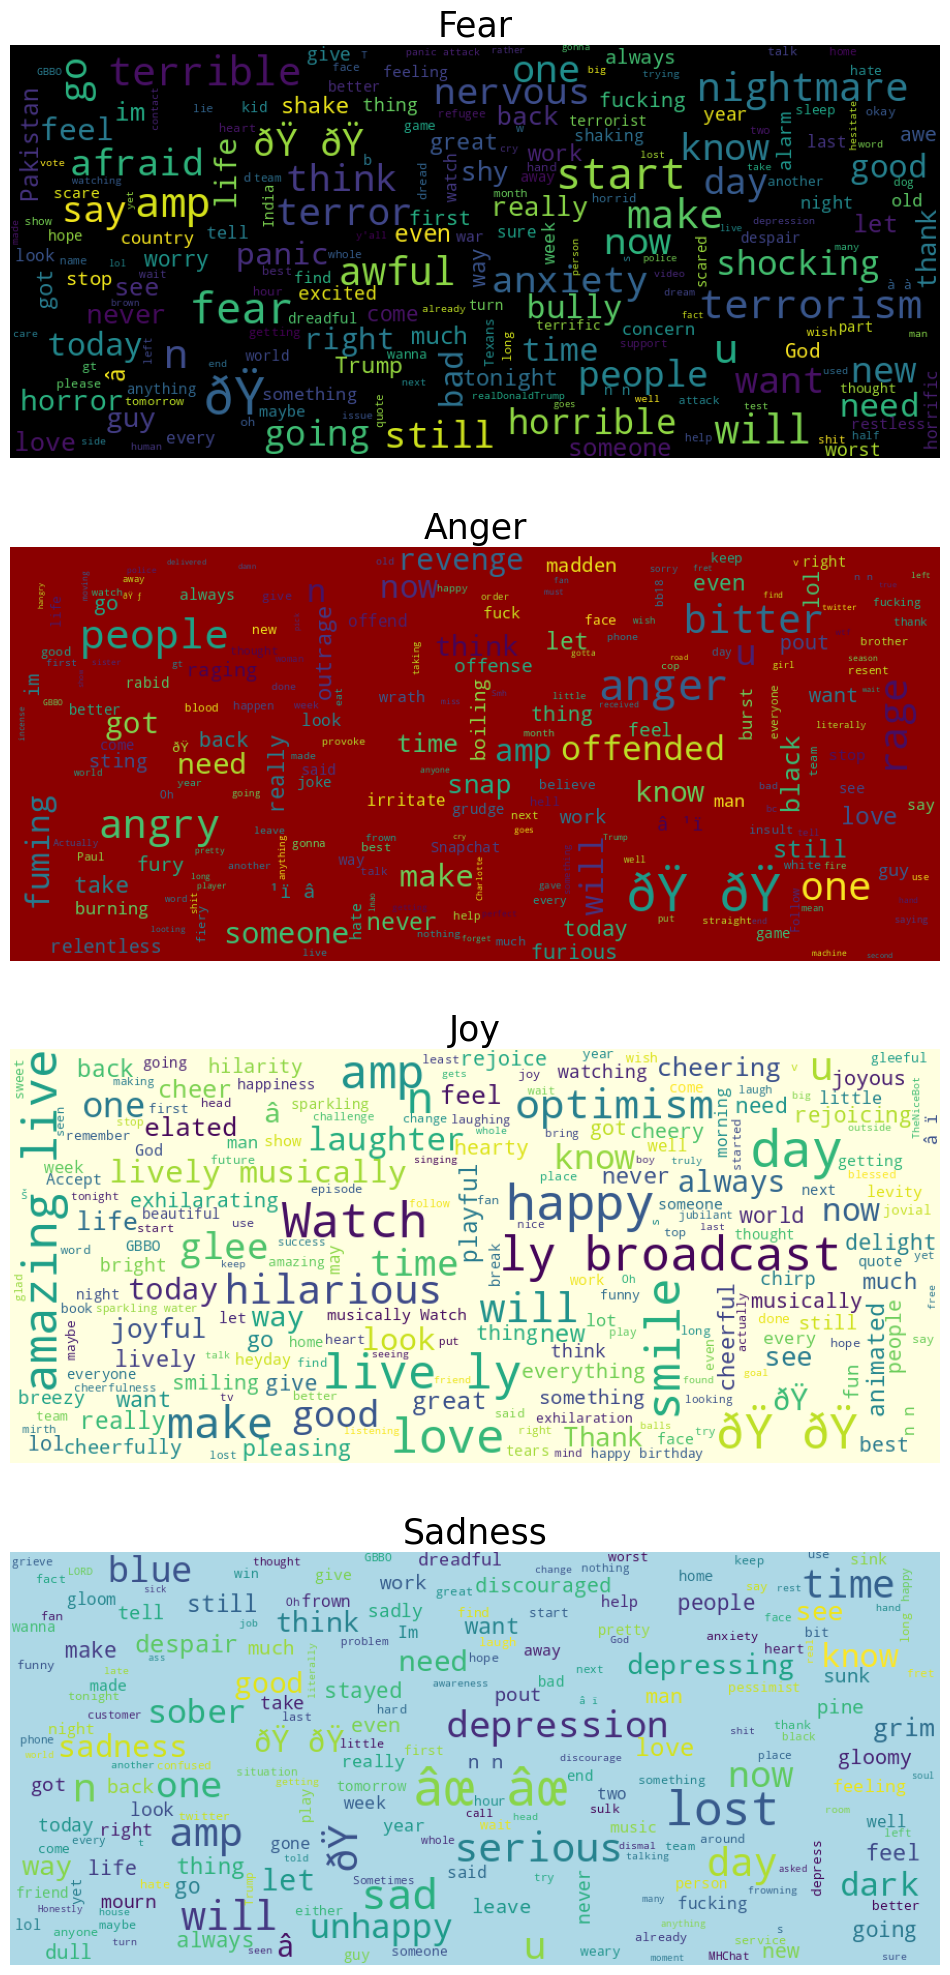

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 25))

ax1.imshow(fear_wordcloud)
ax1.set_title("Fear", size=25)
ax1.axis('off')

ax2.imshow(anger_wordcloud)
ax2.set_title("Anger", size=25)
ax2.axis('off')

ax3.imshow(joy_wordcloud)
ax3.set_title("Joy", size=25)
ax3.axis('off')

ax4.imshow(sadness_wordcloud)
ax4.set_title("Sadness", size=25)
ax4.axis('off')

# Training
<a id='Training'></a>

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Cleaning text by removing links, numbers, @, stopwords, and transform all to lower case
from nltk.corpus import stopwords

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'[0-9]+'
combined_pat = r'|'.join((pat1, pat2, pat3))
stop_words= set(stopwords.words('english'))

def tweet_cleaner(data_frame):
    print('Cleaning and parsing the tweets.....\n')
    clean_data = []
    for index, row in data_frame.iterrows():
        stripped = re.sub(combined_pat, '', row.text)
        lower_case = stripped.lower()
        words = tok.tokenize(lower_case)
        filtered_words = [w for w in words if not w in stop_words]
        clean_data.append((' '.join(filtered_words)).strip())

    print('Done!')
    return clean_data

In [ ]:
clean_data_training_list = tweet_cleaner(data_training)

Cleaning and parsing the tweets.....

Done!


In [ ]:
data_training.text = pd.DataFrame(clean_data_training_list)
data_training.head()

,id,text,label,intensity,word_count,char_count,punc_count
0,10000,fu * k ! heck ! moved fridge !... knock landlo...,anger,0.938,18,79,12
1,10001,indian uber driver called someone n word . ' m...,anger,0.896,23,97,4
2,10002,asked parcel delivered pick store address # fu...,anger,0.896,19,90,4
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,24,111,13
4,10004,"' join put phone , talk rude . taking money ac...",anger,0.896,24,102,6


In [ ]:
#making one-hot encoding of label
labels = pd.get_dummies(data_training['label'])

#applying bag of words and tf-idf technique to vectorise the tweets
vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 3))
X_BoW = vectorizer.fit_transform(data_training.text)
X_BoW = pd.DataFrame.sparse.from_spmatrix(X_BoW).join(labels)

vectorizer_tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer_tfidf.fit_transform(data_training.text)
X_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf).join(labels)

In [ ]:
#Training Regression Models

#Linear Regression
X_BoW.columns = X_BoW.columns.astype(str)
X_tfidf.columns = X_tfidf.columns.astype(str)

BoW_linreg = LinearRegression().fit(X_BoW, data_training['intensity'])
tfidf_linreg = LinearRegression().fit(X_tfidf, data_training['intensity'])
#Ridge Regression
BoW_ridge = Ridge().fit(X_BoW, data_training['intensity'])
tfidf_ridge = Ridge().fit(X_tfidf, data_training['intensity'])
#Knn Regression
n_neighbors=5
BoW_knn = neighbors.KNeighborsRegressor(n_neighbors,weights='uniform').fit(X_BoW, data_training['intensity'])
tfidf_knn = neighbors.KNeighborsRegressor(n_neighbors,weights='uniform').fit(X_tfidf, data_training['intensity'])
#Decision Tree Regression
BoW_tree = tree.DecisionTreeRegressor(max_depth=1).fit(X_BoW, data_training['intensity'])
tfidf_tree = tree.DecisionTreeRegressor(max_depth=1).fit(X_tfidf, data_training['intensity'])
#Support Vector Regression
BoW_svr = svm.SVR().fit(X_BoW, data_training['intensity'])
tfidf_svr = svm.SVR().fit(X_tfidf, data_training['intensity'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
#Load data development to test the models
cols = ['id', 'text', 'label', 'intensity']

path = "/content/drive/MyDrive/ML Task/"
anger_dev = pd.read_csv(path + 'anger_development.txt', header=None, sep='\t', names=cols, index_col=0)
fear_dev = pd.read_csv(path + 'fear_development.txt', header=None, sep='\t', names=cols, index_col=0)
sad_dev = pd.read_csv(path + 'sadness_development.txt', header=None, sep='\t', names=cols, index_col=0)
joy_dev = pd.read_csv(path + 'joy_development.txt', header=None, sep='\t', names=cols, index_col=0)

joy_dev.head()

,text,label,intensity
id,,,
30823,"@theclobra lol I thought maybe, couldn't decid...",joy,0.312
30824,Nawaz Sharif is getting more funnier than @kap...,joy,0.700
30825,Nawaz Sharif is getting more funnier than @kap...,joy,0.580
30826,@tomderivan73 ðŸ˜...I'll just people watch an...,joy,0.438
30827,I love my family so much #lucky #grateful #sma...,joy,0.936


In [ ]:
frames = [anger_dev, fear_dev, sad_dev, joy_dev]
data_dev = pd.concat(frames)
data_dev.reset_index(inplace=True)
data_dev.label.value_counts()

fear       110
anger       84
joy         79
sadness     74
Name: label, dtype: int64

In [ ]:
clean_data_dev_list = tweet_cleaner(data_dev)

Cleaning and parsing the tweets.....

Done!


In [ ]:
data_dev.text = pd.DataFrame(clean_data_dev_list)
data_dev.head()

,id,text,label,intensity
0,10857,pls dont insult word ' molna ',anger,0.479
1,10858,would almost took offense actually snapped,anger,0.458
2,10859,rutgers game abomination . affront god man . m...,anger,0.562
3,10860,"' lisa asked started raging , ' call ?' heh",anger,0.500
4,10861,sometimes get mad something minuscule try ruin...,anger,0.708


In [ ]:
labels = pd.get_dummies(data_dev['label'])

X_Dev_BoW = vectorizer.transform(data_dev['text'])
X_Dev_BoW = pd.DataFrame.sparse.from_spmatrix(X_Dev_BoW).join(labels)

X_Dev_tfidf = vectorizer_tfidf.transform(data_dev['text'])
X_Dev_tfidf = pd.DataFrame.sparse.from_spmatrix(X_Dev_tfidf).join(labels)

In [ ]:
#define function to get the scores
def get_score(y_test, y_pred, name):
    print(name + '\n')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('-------------------------------------------------------------------------------')

In [ ]:
X_Dev_BoW.columns = X_Dev_BoW.columns.astype(str)
X_Dev_tfidf.columns = X_Dev_tfidf.columns.astype(str)

get_score(data_dev['intensity'], BoW_linreg.predict(X_Dev_BoW), "BoW-Linear Regression")
get_score(data_dev['intensity'], tfidf_linreg.predict(X_Dev_tfidf), "Tfidf-Linear Regression")

get_score(data_dev['intensity'], BoW_ridge.predict(X_Dev_BoW), "BoW-Ridge Regression")
get_score(data_dev['intensity'], tfidf_ridge.predict(X_Dev_BoW), "Tfidf-Ridge Regression")

get_score(data_dev['intensity'], BoW_knn.predict(X_Dev_BoW), "BoW-Knn Regression")
get_score(data_dev['intensity'], tfidf_knn.predict(X_Dev_tfidf), "Tfidf-Knn Regression")

get_score(data_dev['intensity'], BoW_tree.predict(X_Dev_BoW), "BoW-Decision Tree Regression")
get_score(data_dev['intensity'], tfidf_tree.predict(X_Dev_tfidf), "Tfidf-Decision Tree Regression")

get_score(data_dev['intensity'], BoW_svr.predict(X_Dev_BoW), "BoW-SVR")
get_score(data_dev['intensity'], tfidf_svr.predict(X_Dev_tfidf), "Tfidf-SVR")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


BoW-Linear Regression

Mean Absolute Error: 0.15150847104646975
Mean Squared Error: 0.03738940950655319
Root Mean Squared Error: 0.19336341305053856
-------------------------------------------------------------------------------
Tfidf-Linear Regression

Mean Absolute Error: 0.14956344560518733
Mean Squared Error: 0.03647894621052591
Root Mean Squared Error: 0.19099462351209237
-------------------------------------------------------------------------------
BoW-Ridge Regression

Mean Absolute Error: 0.14353399764269448
Mean Squared Error: 0.033005283211300494
Root Mean Squared Error: 0.18167356222439326
-------------------------------------------------------------------------------
Tfidf-Ridge Regression

Mean Absolute Error: 0.2465235398821465
Mean Squared Error: 0.10510137600845543
Root Mean Squared Error: 0.32419342375880394
-------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


BoW-Knn Regression

Mean Absolute Error: 0.14846224783861672
Mean Squared Error: 0.03472618259365994
Root Mean Squared Error: 0.18634962461368132
-------------------------------------------------------------------------------
Tfidf-Knn Regression

Mean Absolute Error: 0.15290144092219024
Mean Squared Error: 0.036061280691642654
Root Mean Squared Error: 0.18989807974711764
-------------------------------------------------------------------------------
BoW-Decision Tree Regression

Mean Absolute Error: 0.14923909502585422
Mean Squared Error: 0.03313201210286191
Root Mean Squared Error: 0.18202200994072643
-------------------------------------------------------------------------------
Tfidf-Decision Tree Regression

Mean Absolute Error: 0.15475332498289587
Mean Squared Error: 0.03527583055973097
Root Mean Squared Error: 0.18781861079171833
-------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


BoW-SVR

Mean Absolute Error: 0.13193313484846575
Mean Squared Error: 0.027304114514774356
Root Mean Squared Error: 0.16523956703760256
-------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Tfidf-SVR

Mean Absolute Error: 0.12655035303671294
Mean Squared Error: 0.025311703840233346
Root Mean Squared Error: 0.15909652365854304
-------------------------------------------------------------------------------


In [ ]:
#SVR model with tf-idf vectorisation produce the smallest error, so it is chosen as the final model
y_actual = data_dev['intensity']
y_predicted = tfidf_svr.predict(X_Dev_tfidf)

pd.DataFrame(data={"Actual Intensity" : data_dev['intensity'], "Predicted Intensity" : tfidf_svr.predict(X_Dev_tfidf)})

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


,Actual Intensity,Predicted Intensity
0,0.479,0.470807
1,0.458,0.385844
2,0.562,0.498325
3,0.500,0.592302
4,0.708,0.527264
...,...,...
342,0.580,0.507451
343,0.170,0.453945
344,0.396,0.319927
345,0.156,0.338959


Text(0, 0.5, 'Predicted Intensity')

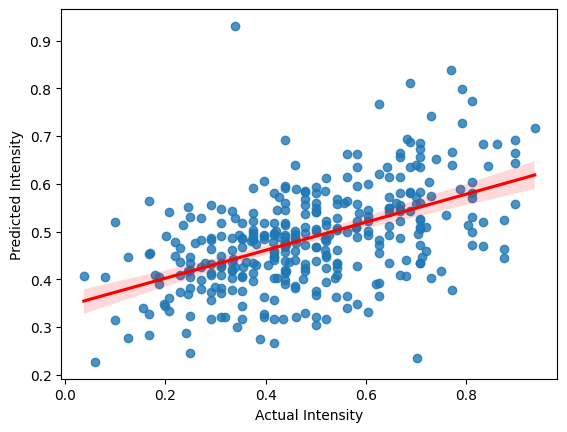

In [ ]:
#Plotting distribution of actual intensity to the predicted intensity
sns.regplot(x=y_actual, y=y_predicted, line_kws={'color':'red'})
plt.xlabel("Actual Intensity")
plt.ylabel("Predicted Intensity")


In [ ]:
#Training the final model with the combination of training and development data
combined_training = pd.concat([data_training[['id', 'text', 'label', 'intensity']], data_dev]).reset_index()
combined_training.shape

(3960, 5)

In [ ]:
#making a separate model for each emotion

#ANGER
anger = combined_training.loc[combined_training['label']=='anger']
anger_vectorizer = TfidfVectorizer(max_features=1000)
X_anger = anger_vectorizer.fit_transform(anger['text'])
anger_model = svm.SVR().fit(X_anger, anger['intensity'])

#FEAR
fear = combined_training.loc[combined_training['label']=='fear']
fear_vectorizer = TfidfVectorizer(max_features=1000)
X_fear = fear_vectorizer.fit_transform(fear['text'])
fear_model = svm.SVR().fit(X_fear, fear['intensity'])

#SADNESS
sad = combined_training.loc[combined_training['label']=='sadness']
sad_vectorizer = TfidfVectorizer(max_features=1000)
X_sad = sad_vectorizer.fit_transform(sad['text'])
sad_model = svm.SVR().fit(X_sad, sad['intensity'])

#JOY
joy = combined_training.loc[combined_training['label']=='joy']
joy_vectorizer = TfidfVectorizer(max_features=1000)
X_joy = joy_vectorizer.fit_transform(joy['text'])
joy_model = svm.SVR().fit(X_joy, joy['intensity'])

# Testing
<a id='Testing'></a>

In [ ]:
#Load testing data
cols = ["id", "text", "label", "intensity"]

path = "/content/drive/MyDrive/ML Task/"
anger_test = pd.read_csv(path + "anger_test.txt", header=None, sep="\t", names=cols, index_col=0)
fear_test = pd.read_csv(path + "fear_test.txt", header=None, sep="\t", names=cols, index_col=0)
sad_test = pd.read_csv(path + "sadness_test.txt", header=None, sep="\t", names=cols, index_col=0)
joy_test = pd.read_csv(path + "joy_test.txt", header=None, sep="\t", names=cols, index_col=0)

anger_test.head()

,text,label,intensity
id,,,
10941,At the point today where if someone says somet...,anger,0.319
10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
10943,This game has pissed me off more than any othe...,anger,0.898
10944,@spamvicious I've just found out it's Candice ...,anger,0.271
10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646


In [ ]:
#cleaning the test data
anger_text = tweet_cleaner(anger_test)
fear_text = tweet_cleaner(fear_test)
sad_text = tweet_cleaner(sad_test)
joy_text = tweet_cleaner(joy_test)

Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!


In [ ]:
#making prediction using the final model

#ANGER
X_anger_test = anger_vectorizer.transform(anger_text)
Y_anger_actual = anger_test['intensity']
Y_anger_predicted = anger_model.predict(X_anger_test)

#FEAR
X_fear_test = fear_vectorizer.transform(fear_text)
Y_fear_actual = fear_test['intensity']
Y_fear_predicted = fear_model.predict(X_fear_test)

#SADNESS
X_sad_test = sad_vectorizer.transform(sad_text)
Y_sad_actual = sad_test['intensity']
Y_sad_predicted = sad_model.predict(X_sad_test)

#JOY
X_joy_test = joy_vectorizer.transform(joy_text)
Y_joy_actual = joy_test['intensity']
Y_joy_predicted = joy_model.predict(X_joy_test)






Text(0.5, 1.0, 'JOY')

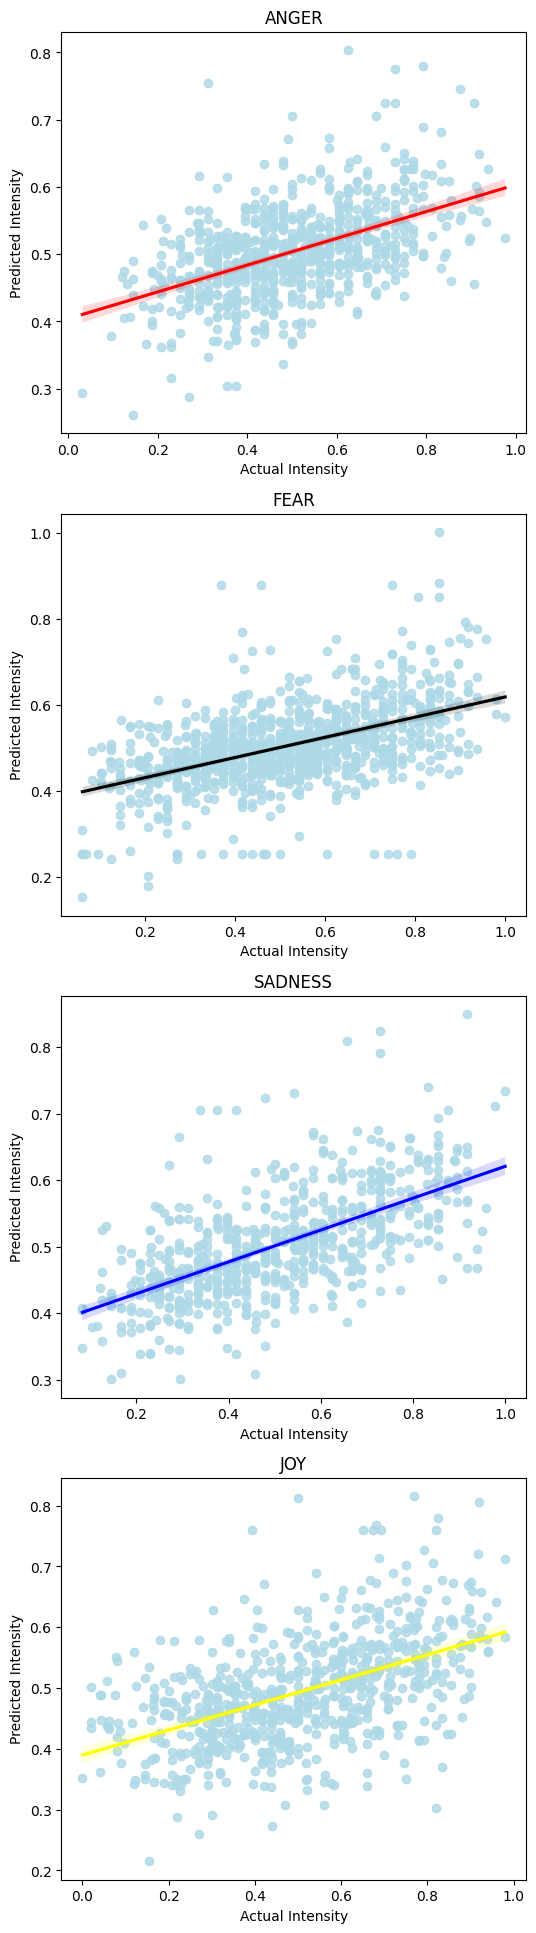

In [ ]:
#Visualising the result of the predictions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 24))

#ANGER
sns.regplot(x=Y_anger_actual, y=Y_anger_predicted, ax=ax1, line_kws={'color':'red'}, scatter_kws={"color": "lightblue"})
ax1.set_xlabel("Actual Intensity")
ax1.set_ylabel("Predicted Intensity")
ax1.set_title("ANGER")

#FEAR
sns.regplot(x=Y_fear_actual, y=Y_fear_predicted, ax=ax2, line_kws={'color':'black'}, scatter_kws={"color": "lightblue"})
ax2.set_xlabel("Actual Intensity")
ax2.set_ylabel("Predicted Intensity")
ax2.set_title("FEAR")

#SADNESS
sns.regplot(x=Y_sad_actual, y=Y_sad_predicted, ax=ax3, line_kws={'color':'blue'}, scatter_kws={"color": "lightblue"})
ax3.set_xlabel("Actual Intensity")
ax3.set_ylabel("Predicted Intensity")
ax3.set_title("SADNESS")

#JOY
sns.regplot(x=Y_joy_actual, y=Y_joy_predicted, ax=ax4, line_kws={'color':'yellow'}, scatter_kws={"color": "lightblue"})
ax4.set_xlabel("Actual Intensity")
ax4.set_ylabel("Predicted Intensity")
ax4.set_title("JOY")


In [ ]:


# Check for NaN values in Y_anger_actual

for i in Y_anger_actual:
  print(i)


0.319
0.144
0.898
0.271
0.646
0.583
0.375
0.625
0.396
0.25
0.438
0.708
0.333
0.877
0.708
0.417
0.229
0.375
0.667
0.354
0.812
0.562
0.312
0.625
0.458
0.521
0.583
0.458
0.271
0.188
0.271
0.708
0.417
0.292
0.771
0.521
0.271
0.729
0.5
0.938
0.917
0.479
0.375
0.648
0.667
0.755
0.792
0.521
0.479
0.5
0.417
0.5
0.396
0.333
0.798
0.375
0.173
0.771
0.625
0.906
0.333
0.438
0.25
0.646
0.5
0.5
0.688
0.479
0.604
0.375
0.458
0.323
0.542
0.229
0.375
0.354
0.465
0.521
0.562
0.292
0.521
0.396
0.646
0.396
0.438
0.875
0.688
0.438
0.396
0.333
0.438
0.583
0.562
0.271
0.833
0.91
0.771
0.851
0.296
0.292
0.479
0.458
0.521
0.492
0.312
0.292
0.562
0.583
0.458
0.229
0.375
0.604
0.583
0.219
0.396
0.354
0.356
0.458
0.354
0.292
0.121
0.417
0.84
0.354
0.271
0.192
0.292
0.438
0.208
0.292
0.688
0.604
0.583
0.354
0.375
0.354
0.333
0.5
0.271
0.25
0.583
0.542
0.5
0.417
0.688
0.417
0.542
0.688
0.312
0.521
0.396
0.375
0.333
0.729
0.708
0.688
0.78
0.688
0.583
0.354
0.438
0.354
0.583
0.454
0.49
0.292
0.542
0.458
0.729
0.708
0

In [ ]:
get_score(Y_anger_actual, Y_anger_predicted, "Result of Anger Model")
get_score(Y_fear_actual, Y_fear_predicted, "Result of Fear Model")
get_score(Y_sad_actual, Y_sad_predicted, "Result of Sadness Model")
get_score(Y_joy_actual, Y_joy_predicted, "Result of Joy Model")

Result of Anger Model

Mean Absolute Error: 0.12155753989110916
Mean Squared Error: 0.02242922115360211
Root Mean Squared Error: 0.14976388467718815
-------------------------------------------------------------------------------
Result of Fear Model

Mean Absolute Error: 0.14141300966569284
Mean Squared Error: 0.03004975596446412
Root Mean Squared Error: 0.1733486543485819
-------------------------------------------------------------------------------
Result of Sadness Model

Mean Absolute Error: 0.13790145847780144
Mean Squared Error: 0.02783600681386191
Root Mean Squared Error: 0.16684126232398838
-------------------------------------------------------------------------------
Result of Joy Model

Mean Absolute Error: 0.1548156591701606
Mean Squared Error: 0.035648511622141096
Root Mean Squared Error: 0.18880813441729966
-------------------------------------------------------------------------------


# Evaluation
<a id='Evaluasi'></a>

In [ ]:
#Using the official evalution function
def evaluate(pred,gold):

    # lists storing gold and prediction scores
    gold_scores=[]
    pred_scores=[]

    # lists storing gold and prediction scores where gold score >= 0.5
    gold_scores_range_05_1=[]
    pred_scores_range_05_1=[]

    for p in pred:
        pred_scores.append(p)

    for g in gold:
        gold_scores.append(g)

    for i in range(len(gold_scores)):
        if gold_scores[i] >= 0.5:
            gold_scores_range_05_1.append(gold_scores[i])
            pred_scores_range_05_1.append(pred_scores[i])


    # return zero correlation if predictions are constant
    if np.std(pred_scores)==0 or np.std(gold_scores)==0:
        return (0,0,0,0)


    pears_corr=scipy.stats.pearsonr(pred_scores,gold_scores)[0]
    pears_corr_range_05_1=scipy.stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]


    return (pears_corr,pears_corr_range_05_1)

In [ ]:
pear_results=[]
spear_results=[]

pear_results_range_05_1=[]
spear_results_range_05_1=[]

num_pairs = 4
argv = ["Anger_Actual", Y_anger_actual, "Anger_Predicted", Y_anger_predicted, "Fear_Actual", Y_fear_actual, "Fear_Predicted", Y_fear_predicted, "Sad_Actual", Y_sad_actual, "Sad_Predicted", Y_sad_predicted, "Joy_Actual", Y_joy_actual, "Joy_Predicted", Y_joy_predicted]

for i in range(0,num_pairs*4,4):
    name_gold = argv[i]
    gold=argv[i+1]
    name_pred = argv[i+2]
    pred=argv[i+3]
    result=evaluate(pred,gold)

    print ("Pearson correlation between ", name_pred, " and ", name_gold, ":\t", str(result[0]))
    pear_results.append(result[0])


    print ("Pearson correlation for gold scores in range 0.5-1 between ",name_pred," and ",name_gold,":\t",str(result[1]))
    pear_results_range_05_1.append(result[1])


avg_pear=np.mean(pear_results)

avg_pear_range_05_1=np.mean(pear_results_range_05_1)

print ("Average Pearson correlation:\t",str(avg_pear))

print ("Average Pearson correlation for gold scores in range 0.5-1:\t", str(avg_pear_range_05_1))

Pearson correlation between  Anger_Predicted  and  Anger_Actual :	 0.5004764274490345
Pearson correlation for gold scores in range 0.5-1 between  Anger_Predicted  and  Anger_Actual :	 0.3797482723905562
Pearson correlation between  Fear_Predicted  and  Fear_Actual :	 0.5068453998964537
Pearson correlation for gold scores in range 0.5-1 between  Fear_Predicted  and  Fear_Actual :	 0.4003655389378813
Pearson correlation between  Sad_Predicted  and  Sad_Actual :	 0.6066486980752585
Pearson correlation for gold scores in range 0.5-1 between  Sad_Predicted  and  Sad_Actual :	 0.4323335424234236
Pearson correlation between  Joy_Predicted  and  Joy_Actual :	 0.5089009885116099
Pearson correlation for gold scores in range 0.5-1 between  Joy_Predicted  and  Joy_Actual :	 0.3368146479168937
Average Pearson correlation:	 0.5307178784830892
Average Pearson correlation for gold scores in range 0.5-1:	 0.3873155004171887
